## 9.1. Importing Required Libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten, Dropout, MaxPool2D

from tensorflow.keras.models import Model


## 9.2. Importing the Dataset


In [7]:
## https://www.nist.gov/itl/products-and-services/emnist-dataset
## pip install mnist
from emnist import list_datasets

In [8]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [91]:
from emnist import extract_training_samples
training_images, training_labels = extract_training_samples('letters')


In [92]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('letters')


## 9.3. Data Analysis and Preprocessing

In [93]:
print(training_images.shape)
print(test_images.shape)

(124800, 28, 28)
(20800, 28, 28)


In [94]:
print(training_labels.shape)
print(test_labels.shape)

(124800,)
(20800,)


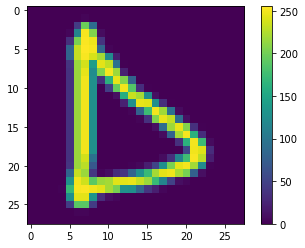

In [95]:
plt.figure()
plt.imshow(test_images[3000])
plt.colorbar()
plt.grid(False)
plt.show()


In [96]:
print(test_labels[3000])

4


In [97]:
np.unique(test_labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [98]:
output_classes = len(set(training_labels))

In [99]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)


(124800, 28, 28, 1)


## 9.4. Training and Fitting CNN Model

In [100]:
input_layer = Input(shape = training_images[0].shape )

conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)

maxpool1 = MaxPool2D(2, 2)(conv1)

conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)

flat1 = Flatten()(conv2)

drop1 = Dropout(0.2)(flat1)

dense1 = Dense(512, activation = 'relu')(drop1)

drop2  = Dropout(0.2)(dense1)

output_layer = Dense(output_classes+1, activation= 'softmax')(drop2)


In [101]:
model = Model(input_layer, output_layer)

In [102]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [104]:
model_history = model.fit(training_images, training_labels, batch_size = 32, epochs=20, validation_data=(test_images, test_labels), verbose=1)



Epoch 1/20
3900/3900 [==============================] - 16s 4ms/step - loss: 1.0122 - accuracy: 0.6963 - val_loss: 0.4976 - val_accuracy: 0.8361
Epoch 2/20
3900/3900 [==============================] - 15s 4ms/step - loss: 0.5888 - accuracy: 0.8063 - val_loss: 0.4431 - val_accuracy: 0.8508
Epoch 3/20
3900/3900 [==============================] - 16s 4ms/step - loss: 0.5269 - accuracy: 0.8261 - val_loss: 0.4340 - val_accuracy: 0.8592
Epoch 4/20
3900/3900 [==============================] - 18s 5ms/step - loss: 0.4958 - accuracy: 0.8346 - val_loss: 0.4029 - val_accuracy: 0.8654
Epoch 5/20
3900/3900 [==============================] - 17s 4ms/step - loss: 0.4832 - accuracy: 0.8396 - val_loss: 0.3913 - val_accuracy: 0.8698
Epoch 6/20
3900/3900 [==============================] - 18s 5ms/step - loss: 0.4696 - accuracy: 0.8424 - val_loss: 0.3823 - val_accuracy: 0.8720
Epoch 7/20
3900/3900 [==============================] - 18s 5ms/step - loss: 0.4633 - accuracy: 0.8451 - val_loss: 0.3877 - val_ac

## 9.5. Model Evaluation

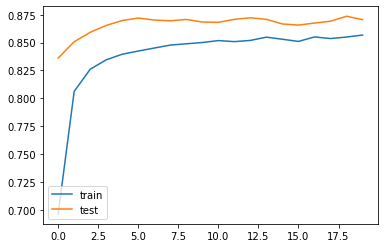

In [105]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')


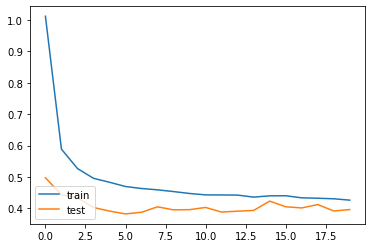

In [106]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='lower left')


## 9.6. Making Prediction on Single Image

In [124]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('letters')


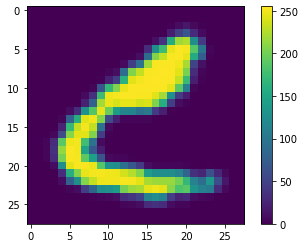

In [125]:
plt.figure()
plt.imshow(test_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

In [126]:
print(test_labels[2000])

3


In [131]:
output = model.predict(test_images)
prediction = np.argmax(output[2000])
print(prediction)


3


## Exercise 9.1


**Question 1:**

Dropout layer is added in a TensorFlow Keras neural network to:

A. Increase Accuracy

B. Reduce Overfitting

C. Reduce Loss

D. Increase Overfitting

**Answer: B**
    

**Question 2:**

In Keras Functional API, which of the following functions is used to add layers to a neural network model?

A. add()

B. append()

C. insert()
 
D. None of the above()

**Answer: D**
    
    
**Question 3:**

Which of the following functions can be used to add a new dimension to a numpy array?

A. add_dims()

B. append_dims()

C. expand_dims()
 
D. insert_dims()

**Answer: C**
